In [2004]:
# importing the requisite libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2005]:
df = pd.read_csv('/Users/Karan/Downloads/train-2.csv')

In [2006]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2007]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Data Cleaning 

In [2008]:
# check the null values in the numerical data
df.select_dtypes(include=['int64','float']).isnull().sum()[df.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [2009]:
# Impute with median values for LotFrontage,GarageYrBlt and MasVnrArea 
df['LotFrontage'] = df['LotFrontage'].replace(np.nan, df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan, df['MasVnrArea'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].replace(np.nan, df['GarageYrBlt'].median())

In [2010]:
# check the null values in the numerical data
df.select_dtypes(include=['int64','float']).isnull().sum()[df.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

Series([], dtype: int64)

In [2011]:
# check for null values in all categorical columns
df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [2012]:
## Filling NaN values according to Data Dictionary Given
df['Alley']=df['Alley'].fillna('Na')
df['PoolQC']=df['PoolQC'].fillna('Na')
df['Fence']=df['Fence'].fillna('Na')
df['MiscFeature']=df['MiscFeature'].fillna('Na')
df['FireplaceQu']=df['FireplaceQu'].fillna('Na')
df['BsmtQual']=df['BsmtQual'].fillna('Na')
df['GarageQual']=df['GarageQual'].fillna('Na')
df['BsmtCond']=df['BsmtCond'].fillna('Na')
df['MasVnrType']=df['MasVnrType'].fillna('Na')
df['BsmtExposure']=df['BsmtExposure'].fillna('Na')
df['BsmtFinType1']=df['BsmtFinType1'].fillna('Na')
df['BsmtFinType2']=df['BsmtFinType2'].fillna('Na')
df['GarageType']=df['GarageType'].fillna('Na')
df['GarageFinish']=df['GarageFinish'].fillna('Na')
df['GarageCond']=df['GarageCond'].fillna('Na')

In [2013]:
# check for null values in all categorical columns
df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]

Electrical    1
dtype: int64

In [2014]:
## Removing columns which have same value for 80% of rows
def getCatVC():
    columns = []
    cc = df.select_dtypes(include=['object'])
    for col in (cc):
        if(df[col].value_counts().max() >= 1168):
            columns.append(col)
    return columns

columns_with_same_values = getCatVC()

In [2015]:
# Remove the columns with skewed data
df.drop(columns_with_same_values, axis = 1, inplace = True)

In [2016]:
# check for null values in all categorical columns
df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

In [2017]:
# check for percentage of null values in each column
percent_missing = round(100*(df.isnull().sum()/len(df.index)), 2)
print(percent_missing)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
LotShape         0.0
LotConfig        0.0
Neighborhood     0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
Foundation       0.0
BsmtQual         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
HeatingQC        0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
WoodDeckSF   

In [2018]:
# Checking outliers 
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.280000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


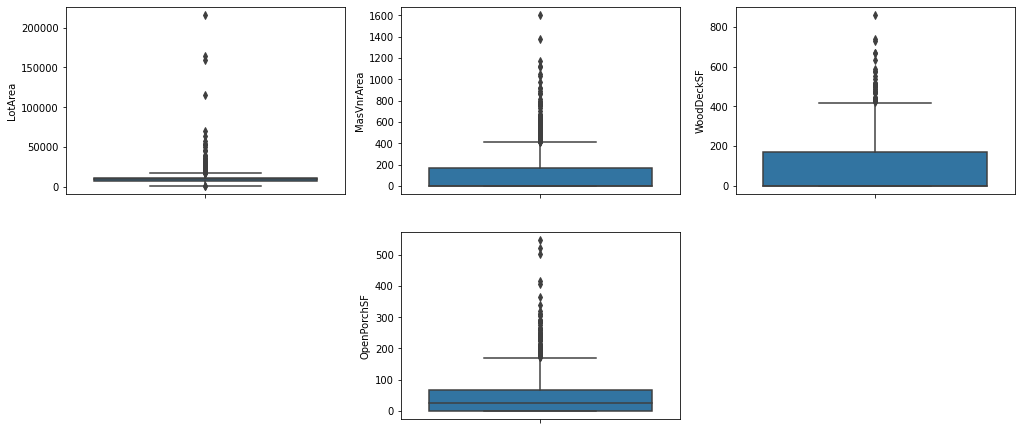

In [2019]:
# Check the outliers

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea',data = df)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea',  data = df)
plt.subplot(5,3,3)
sns.boxplot(y = 'WoodDeckSF',  data = df)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF',  data = df)
plt.show()

In [2020]:
# Outlier Treatment

df_int_float = df.select_dtypes(include=['float64', 'int64'])
df_int_float_columns = df_int_float.columns
for column in df_int_float_columns:
    Q1 = df[column].quantile(0.1)
    Q3 = df[column].quantile(0.9)
    IQR = Q3 - Q1
    df = df.loc[(df[column] >= Q1 - 1.5*IQR) & (df[column] <= Q3 + 1.5*IQR)]

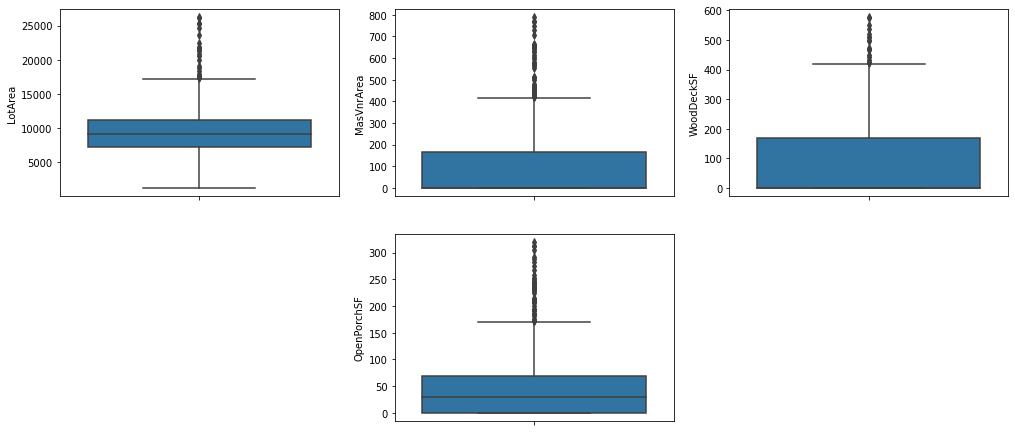

In [2021]:
# Check the outliers
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea',data = df)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea',  data = df)
plt.subplot(5,3,3)
sns.boxplot(y = 'WoodDeckSF',  data = df)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF',  data = df)
plt.show()

In [2023]:
## Printing all int columns
df.select_dtypes(include=['float64', 'int64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [2024]:
## Dividing saleprice with 100000
df['SalePrice']/=1000000

Correlation is 0.6987466636149041 between GarageArea and SalePrice 


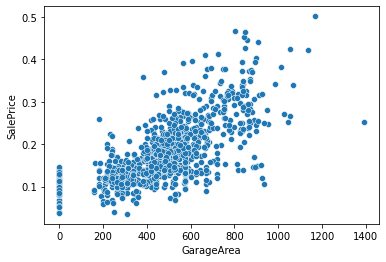

In [2025]:
# Plotting a scatter plot
X = 'GarageArea'
Y = 'SalePrice'
sns.scatterplot( data = df , x = X , y = Y)
print('Correlation is {} between {} and {} '.format(df[X].corr(df[Y]),X,Y))

Correlation is 0.4091411613393584 between LotArea and SalePrice 


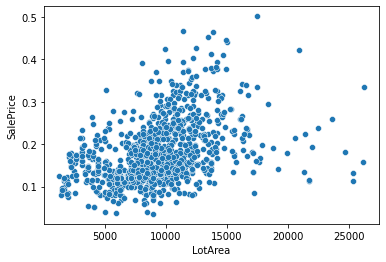

In [2026]:
# Plotting a scatter plot
X = 'LotArea'
Y = 'SalePrice'
sns.scatterplot( data = df , x = X , y = Y)
print('Correlation is {} between {} and {} '.format(df[X].corr(df[Y]),X,Y))

Correlation is 0.5964879152515189 between YearBuilt and SalePrice 


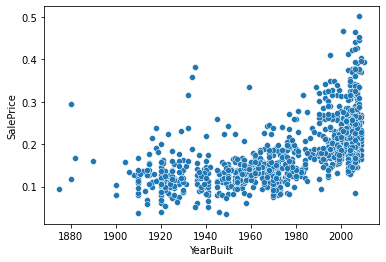

In [2027]:
# Plotting a scatter plot
X = 'YearBuilt'
Y = 'SalePrice'
sns.scatterplot( data = df , x = X , y = Y)
print('Correlation is {} between {} and {} '.format(df[X].corr(df[Y]),X,Y))

Correlation is 0.4836516535853569 between MasVnrArea and SalePrice 


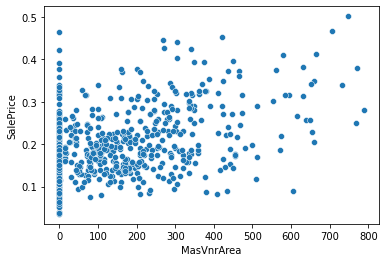

In [2028]:
# Plotting a scatter plot
X = 'MasVnrArea'
Y = 'SalePrice'
sns.scatterplot( data = df , x = X , y = Y)
print('Correlation is {} between {} and {} '.format(df[X].corr(df[Y]),X,Y))


Correlation is 0.3906468839714882 between BsmtFinSF1 and SalePrice 


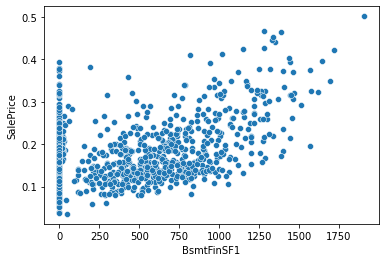

In [2029]:
# Plotting a scatter plot
X = 'BsmtFinSF1'
Y = 'SalePrice'
sns.scatterplot( data = df , x = X , y = Y)
print('Correlation is {} between {} and {} '.format(df[X].corr(df[Y]),X,Y))

Correlation is 0.21473664028620154 between BsmtUnfSF and SalePrice 


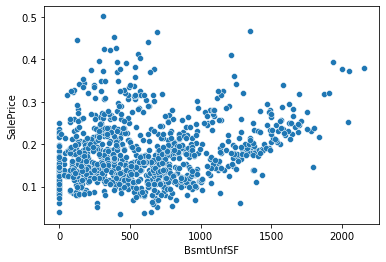

In [2030]:
# Plotting a scatter plot
X = 'BsmtUnfSF'
Y = 'SalePrice'
sns.scatterplot( data = df , x = X , y = Y)
print('Correlation is {} between {} and {} '.format(df[X].corr(df[Y]),X,Y))

Correlation is 0.6677138775811963 between TotalBsmtSF and SalePrice 


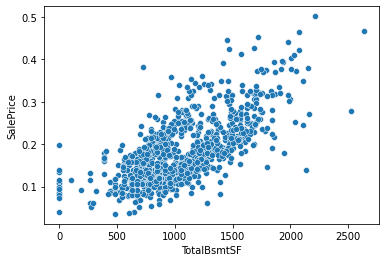

In [2031]:
# Plotting a scatter plot
X = 'TotalBsmtSF'
Y = 'SalePrice'
sns.scatterplot( data = df , x = X , y = Y)
print('Correlation is {} between {} and {} '.format(df[X].corr(df[Y]),X,Y))

Correlation is 0.6585558595942912 between 1stFlrSF and SalePrice 


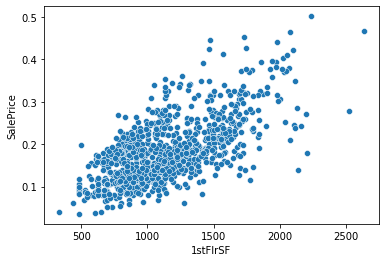

In [2032]:
# Plotting a scatter plot
X = '1stFlrSF'
Y = 'SalePrice'
sns.scatterplot( data = df , x = X , y = Y)
print('Correlation is {} between {} and {} '.format(df[X].corr(df[Y]),X,Y))

Correlation is 0.2975354017288406 between 2ndFlrSF and SalePrice 


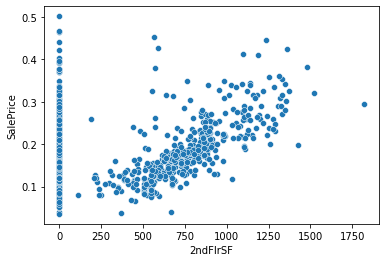

In [2033]:
# Plotting a scatter plot
X = '2ndFlrSF'
Y = 'SalePrice'
sns.scatterplot( data = df , x = X , y = Y)
print('Correlation is {} between {} and {} '.format(df[X].corr(df[Y]),X,Y))

Correlation is 0.7677737111614776 between GrLivArea and SalePrice 


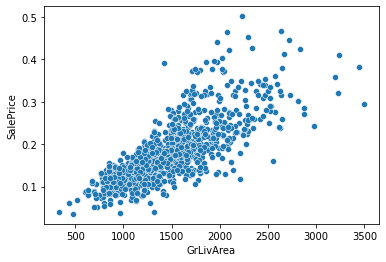

In [2034]:
# Plotting a scatter plot
X = 'GrLivArea'
Y = 'SalePrice'
sns.scatterplot( data = df , x = X , y = Y)
print('Correlation is {} between {} and {} '.format(df[X].corr(df[Y]),X,Y))

Correlation is 0.5359476750293976 between GarageYrBlt and SalePrice 


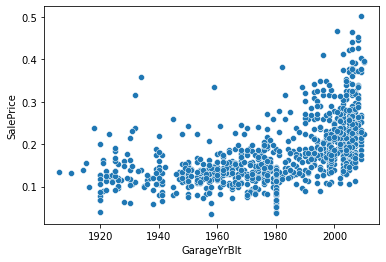

In [2035]:
# Plotting a scatter plot
X = 'GarageYrBlt'
Y = 'SalePrice'
sns.scatterplot( data = df , x = X , y = Y)
print('Correlation is {} between {} and {} '.format(df[X].corr(df[Y]),X,Y))

Correlation is 0.38356565873865184 between WoodDeckSF and SalePrice 


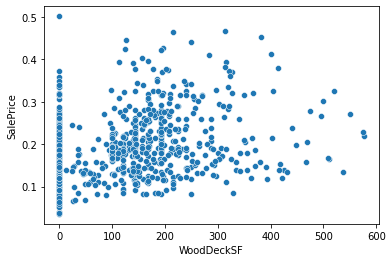

In [2036]:
# Plotting a scatter plot
X = 'WoodDeckSF'
Y = 'SalePrice'
sns.scatterplot( data = df , x = X , y = Y)
print('Correlation is {} between {} and {} '.format(df[X].corr(df[Y]),X,Y))

Correlation is 0.37258386611491595 between OpenPorchSF and SalePrice 


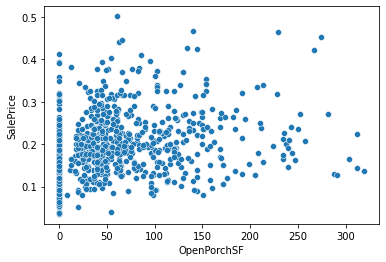

In [2037]:
# Plotting a scatter plot
X = 'OpenPorchSF'
Y = 'SalePrice'
sns.scatterplot( data = df , x = X , y = Y)
print('Correlation is {} between {} and {} '.format(df[X].corr(df[Y]),X,Y))

In [2038]:
## Fitting a linear regression

In [2039]:
X = np.array(df['GrLivArea']).reshape(-1,1)
Y = np.array(df['SalePrice']).reshape(-1,1)

In [2040]:
reg = LinearRegression()
reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [2041]:
y_pred = reg.predict(X)

In [2042]:
r2_score(Y , y_pred)


0.589476471550668

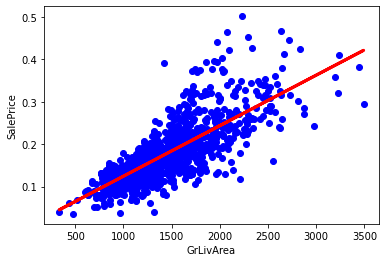

In [2043]:
# Visualizing the model fit
plt.scatter( X , Y , color = 'blue')
plt.plot(X , y_pred , color = 'red' , linewidth = 3)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [2044]:
# Metrics to assess model performance 
rss = np.sum(np.square(Y - y_pred)) # sum of the squared difference between the actual and the predicted values
print(rss)
mse = mean_squared_error(Y, y_pred) # MSE is RSS divided by the number of observations
print(mse)
rmse = mse**0.5 # RMSE is square root of MSE 
print(rmse)

2.1865884672218634
0.0021692345904978805
0.04657504257107964


#### Checking for assumptions

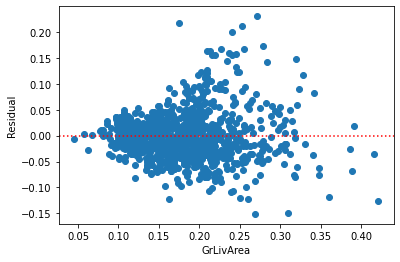

In [2045]:
# Residual analysis
y_res = Y - y_pred # Residuals

# Residual v/s predictions plot

plt.scatter( y_pred , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("GrLivArea")
plt.ylabel("Residual")
plt.show()

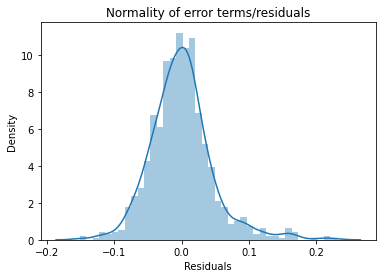

In [2046]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### Multiple Linear Regresion

In [2047]:
X = (df[['GarageArea','TotalBsmtSF','1stFlrSF','GrLivArea']])
Y = np.array(df['SalePrice']).reshape(-1,1)

In [2048]:
reg = LinearRegression()
reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [2049]:
# Predictions on the basis of the model
y_pred = reg.predict(X)
# y_pred

In [2050]:
# Find the value of r squared
r2_score(Y , y_pred) # The four predictors considered explain about 66.25% of the variation in the data

0.7848818055372304

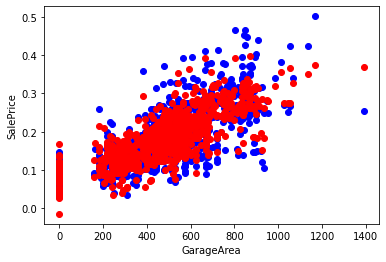

In [2051]:
# Visual comparison between predicted and actual values
plt.scatter( X['GarageArea'] , Y , color = 'blue') # actual values
plt.scatter( X['GarageArea'] , y_pred , color = 'red' ) # predicted values
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")
plt.show()

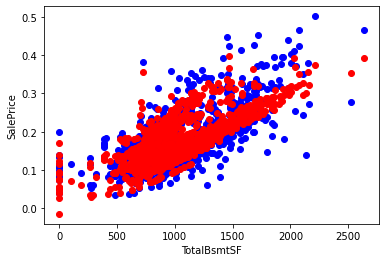

In [2052]:
# Visual comparison between predicted and actual values
plt.scatter( X['TotalBsmtSF'] , Y , color = 'blue') # actual values
plt.scatter( X['TotalBsmtSF'] , y_pred , color = 'red' ) # predicted values
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")
plt.show()

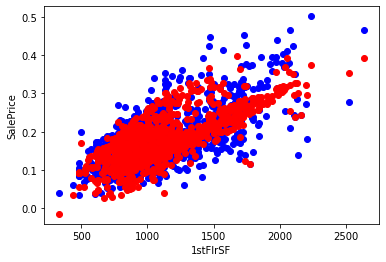

In [2053]:
# Visual comparison between predicted and actual values
plt.scatter( X['1stFlrSF'] , Y , color = 'blue') # actual values
plt.scatter( X['1stFlrSF'] , y_pred , color = 'red' ) # predicted values
plt.xlabel("1stFlrSF")
plt.ylabel("SalePrice")
plt.show()

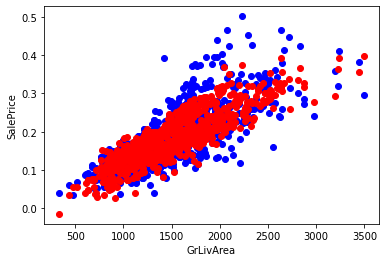

In [2054]:
# Visual comparison between predicted and actual values
plt.scatter( X['GrLivArea'] , Y , color = 'blue') # actual values
plt.scatter( X['GrLivArea'] , y_pred , color = 'red' ) # predicted values
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [2055]:
# Metrics to give an overall sense of error in the model
rss = np.sum(np.square(Y - y_pred))
print(rss)
mse = mean_squared_error(Y, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

1.1457929460916076
0.0011366993512813568
0.03371497221237705


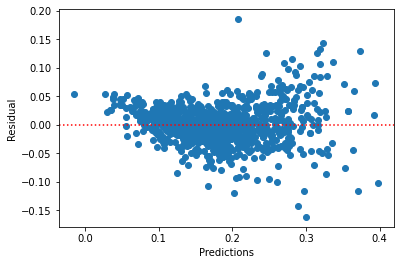

In [2056]:
# Residual analysis
y_res = Y - y_pred
#y_res

plt.scatter( y_pred , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

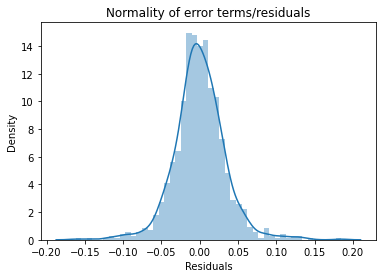

In [2057]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [2058]:
df_int_float.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:>

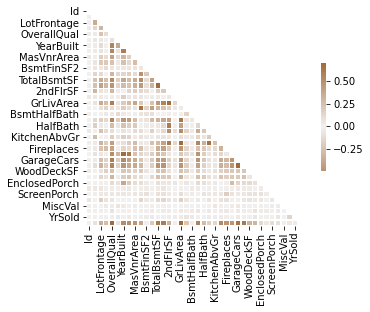

In [2059]:
##Correlation
corr = df_int_float.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(400, 40, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.7, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Data Visualization 

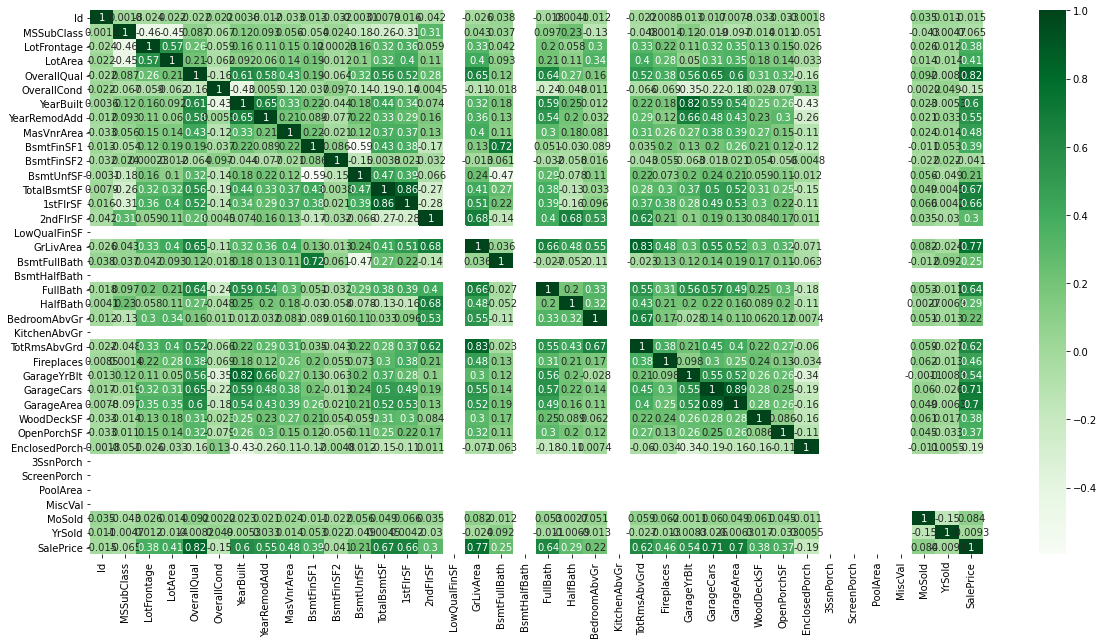

In [2060]:
# Check the correlation of numerical columns
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, cmap="Greens")
plt.show()

#### Removing following columns with high correlation
    - TotRmsAbvGrd and GrLivArea show 83%
    - Garage Area and Garage Cars show 89%

Therefore dropping TotRmsAbvGrd and Garage Cars

In [2061]:
# Removing the highly correlated variables
df.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

## Data Preparation

In [2062]:
# Changing categorical values to numbers

df['KitchenQual'] = df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0,'Na':0 })
df['ExterQual'] = df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0,'Na':0  })
df['BsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0,'Na':0 })
df['HouseStyle'] = df['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0,'Na':0  })
df['LotConfig'] = df['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0,'Na':0   })
df['MasVnrType'] = df['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0,'Na':0 })

df['FireplaceQu'] = df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0,'Na':0})


df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,RL,65.0,8450,Reg,5,CollgCr,4,7,...,0,61,0,0,0,0,0,2,2008,0.2085
2,3,60,RL,68.0,11250,IR1,5,CollgCr,4,7,...,0,42,0,0,0,0,0,9,2008,0.2235
3,4,70,RL,60.0,9550,IR1,4,Crawfor,4,7,...,0,35,272,0,0,0,0,2,2006,0.1400
4,5,60,RL,84.0,14260,IR1,2,NoRidge,4,8,...,192,84,0,0,0,0,0,12,2008,0.2500
6,7,20,RL,75.0,10084,Reg,5,Somerst,1,8,...,255,57,0,0,0,0,0,8,2007,0.3070


In [2063]:
df['HouseStyle'].value_counts()

1    510
4    326
3     94
8     36
7     26
2     11
5      4
6      1
Name: HouseStyle, dtype: int64

In [2064]:
#Creating Dummy Columns


d_BsmtExposure = pd.get_dummies(df['BsmtExposure'], prefix='BsmtExposure', drop_first = True)
df = pd.concat([df, d_BsmtExposure], axis = 1)

d_BsmtFinType1 = pd.get_dummies(df['BsmtFinType1'], prefix='BsmtFinType1', drop_first = True)
df = pd.concat([df, d_BsmtFinType1], axis = 1)

d_LotShape = pd.get_dummies(df['LotShape'], prefix='LotShape', drop_first = True)
df = pd.concat([df, d_LotShape], axis = 1)

d_HeatingQC = pd.get_dummies(df['HeatingQC'], prefix='HeatingQC', drop_first = True)
df = pd.concat([df, d_HeatingQC], axis = 1)

d_MSZoning = pd.get_dummies(df['MSZoning'], prefix='MSZoning', drop_first = True)
df = pd.concat([df, d_MSZoning], axis = 1)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(df['Neighborhood'], prefix='Neighborhood', drop_first = True)
df = pd.concat([df, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(df['RoofStyle'], prefix='RoofStyle', drop_first = True)
df = pd.concat([df, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(df['Exterior1st'], prefix='Exterior1st', drop_first = True)
df = pd.concat([df, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(df['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
df = pd.concat([df, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(df['Foundation'], prefix='Foundation', drop_first = True)
df = pd.concat([df, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(df['GarageType'], prefix='GarageType', drop_first = True)
df = pd.concat([df, d_GarageType], axis = 1)

d_GarageFinish = pd.get_dummies(df['GarageFinish'], prefix='GarageFinish', drop_first = True)
df = pd.concat([df, d_GarageFinish], axis = 1)

df.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,...,Foundation_Stone,Foundation_Wood,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Na,GarageFinish_Na,GarageFinish_RFn,GarageFinish_Unf
0,1,60,RL,65.0,8450,Reg,5,CollgCr,4,7,...,0,0,0,0,0,0,0,0,1,0
2,3,60,RL,68.0,11250,IR1,5,CollgCr,4,7,...,0,0,0,0,0,0,0,0,1,0
3,4,70,RL,60.0,9550,IR1,4,Crawfor,4,7,...,0,0,0,0,0,1,0,0,0,1
4,5,60,RL,84.0,14260,IR1,2,NoRidge,4,8,...,0,0,0,0,0,0,0,0,1,0
6,7,20,RL,75.0,10084,Reg,5,Somerst,1,8,...,0,0,0,0,0,0,0,0,1,0


In [2065]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 0 to 1456
Columns: 143 entries, Id to GarageFinish_Unf
dtypes: float64(4), int64(39), object(12), uint8(88)
memory usage: 527.6+ KB


In [2066]:

df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'LotShape', 'Neighborhood', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'Foundation', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'GarageType', 'GarageFinish'],
      dtype='object')

In [2067]:
# drop the previous columns

df = df.drop(['LotShape','BsmtExposure','BsmtFinType1','HeatingQC','MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType','GarageFinish'], axis=1)

df.head()

,Id,MSSubClass,LotFrontage,LotArea,LotConfig,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Foundation_Stone,Foundation_Wood,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Na,GarageFinish_Na,GarageFinish_RFn,GarageFinish_Unf
0,1,60,65.0,8450,5,4,7,5,2003,2003,...,0,0,0,0,0,0,0,0,1,0
2,3,60,68.0,11250,5,4,7,5,2001,2002,...,0,0,0,0,0,0,0,0,1,0
3,4,70,60.0,9550,4,4,7,5,1915,1970,...,0,0,0,0,0,1,0,0,0,1
4,5,60,84.0,14260,2,4,8,5,2000,2000,...,0,0,0,0,0,0,0,0,1,0
6,7,20,75.0,10084,5,1,8,5,2004,2005,...,0,0,0,0,0,0,0,0,1,0


In [2068]:
df['HouseStyle'].value_counts()

1    510
4    326
3     94
8     36
7     26
2     11
5      4
6      1
Name: HouseStyle, dtype: int64

In [2069]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 0 to 1456
Columns: 131 entries, Id to GarageFinish_Unf
dtypes: float64(4), int64(39), uint8(88)
memory usage: 433.1 KB


### Lets Trainnnnn 

In [2070]:
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

In [2071]:
X.head()

,Id,MSSubClass,LotFrontage,LotArea,LotConfig,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Foundation_Stone,Foundation_Wood,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Na,GarageFinish_Na,GarageFinish_RFn,GarageFinish_Unf
0,1,60,65.0,8450,5,4,7,5,2003,2003,...,0,0,0,0,0,0,0,0,1,0
2,3,60,68.0,11250,5,4,7,5,2001,2002,...,0,0,0,0,0,0,0,0,1,0
3,4,70,60.0,9550,4,4,7,5,1915,1970,...,0,0,0,0,0,1,0,0,0,1
4,5,60,84.0,14260,2,4,8,5,2000,2000,...,0,0,0,0,0,0,0,0,1,0
6,7,20,75.0,10084,5,1,8,5,2004,2005,...,0,0,0,0,0,0,0,0,1,0


In [2072]:
# scaling the features

from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'LotConfig', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       ...
       'Foundation_Stone', 'Foundation_Wood', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_Na', 'GarageFinish_Na', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=130)

In [2073]:
X.head()

,Id,MSSubClass,LotFrontage,LotArea,LotConfig,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Foundation_Stone,Foundation_Wood,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Na,GarageFinish_Na,GarageFinish_RFn,GarageFinish_Unf
0,-1.739761,0.117477,-0.162969,-0.218593,0.524389,0.749474,0.592043,-0.486494,0.917598,0.776294,...,-0.044588,-0.044588,-0.1001,-0.258199,-0.044588,-0.591099,-0.228456,-0.228456,1.493576,-0.801058
1,-1.735019,0.117477,-0.006419,0.538068,0.524389,0.749474,0.592043,-0.486494,0.851301,0.728128,...,-0.044588,-0.044588,-0.1001,-0.258199,-0.044588,-0.591099,-0.228456,-0.228456,1.493576,-0.801058
2,-1.732648,0.360135,-0.423885,0.078667,-0.761703,0.749474,0.592043,-0.486494,-1.999458,-0.813183,...,-0.044588,-0.044588,-0.1001,-0.258199,-0.044588,1.691765,-0.228456,-0.228456,-0.669534,1.248349
3,-1.730276,0.117477,0.828511,1.351478,-3.333887,0.749474,1.317170,-0.486494,0.818153,0.631796,...,-0.044588,-0.044588,-0.1001,-0.258199,-0.044588,-0.591099,-0.228456,-0.228456,1.493576,-0.801058
4,-1.725534,-0.853154,0.358863,0.222973,0.524389,-0.848840,1.317170,-0.486494,0.950746,0.872626,...,-0.044588,-0.044588,-0.1001,-0.258199,-0.044588,-0.591099,-0.228456,-0.228456,1.493576,-0.801058


In [2074]:
# split into train and test
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

In [2075]:
df.columns[df.isna().any()].tolist()

[]

### RFE

In [2076]:
# Running RFE 
from sklearn.feature_selection import RFE

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 20)            
rfe = rfe.fit(X_train, y_train)

In [2077]:
rfe_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Name', 'RFE_support', 'RFE_ranking'])
rfe_df

,Name,RFE_support,RFE_ranking
0,Id,False,81
1,MSSubClass,True,1
2,LotFrontage,False,100
3,LotArea,True,1
4,LotConfig,False,101
5,HouseStyle,False,67
6,OverallQual,True,1
7,OverallCond,True,1
8,YearBuilt,True,1
9,YearRemodAdd,False,50


In [2078]:
rfe_df = rfe_df.loc[rfe_df['RFE_support'] == True]
rfe_df.reset_index(drop=True, inplace=True)

In [2079]:

col = rfe_df['Name'].values

In [2080]:

X_Train_RFE = X_train[col]
X_Test_RFE =  X_test[col]

### Ridge Regression

In [2081]:
# list pf alphas
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV


params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 10.0, 20, ]}
ridge = Ridge()

ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_Train_RFE, y_train) 

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 10.0, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [2082]:
ridge_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
14,20,-0.015145,-0.015767,1
13,10,-0.015158,-0.015789,2
12,1,-0.015169,-0.015823,3
11,0.9,-0.015169,-0.015823,4
10,0.8,-0.015169,-0.015823,5
5,0.3,-0.015166,-0.015823,6
9,0.7,-0.015168,-0.015823,7
6,0.4,-0.015167,-0.015824,8
8,0.6,-0.015168,-0.015824,9
7,0.5,-0.015167,-0.015824,10


In [2083]:
ridge = Ridge(alpha=20)
ridge.fit(X_Train_RFE, y_train)

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [2084]:
## Train R2
y_Train_pred = ridge.predict(X_Train_RFE)
r2_score(y_train, y_Train_pred)




0.9038601608452475

In [2085]:
y_pred = ridge.predict(X_Test_RFE)
mean_squared_error(y_test, y_pred)

0.0007408214320541976

In [2086]:
## Test R2
r2_score(y_test, y_pred)


0.8822619692141302

In [2087]:
##Printing Coefficients and Features
ridge_coeffs = pd.DataFrame({'Feature':X_Train_RFE.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_coeffs.reset_index(drop=True, inplace=True)
ridge_coeffs

,Feature,Coefficient
0,MSSubClass,-0.0048
1,LotArea,0.0037
2,OverallQual,0.0147
3,OverallCond,0.0057
4,YearBuilt,0.0051
5,BsmtQual,0.0085
6,BsmtFinSF1,0.0106
7,BsmtUnfSF,-0.0005
8,TotalBsmtSF,0.0097
9,1stFlrSF,0.0065


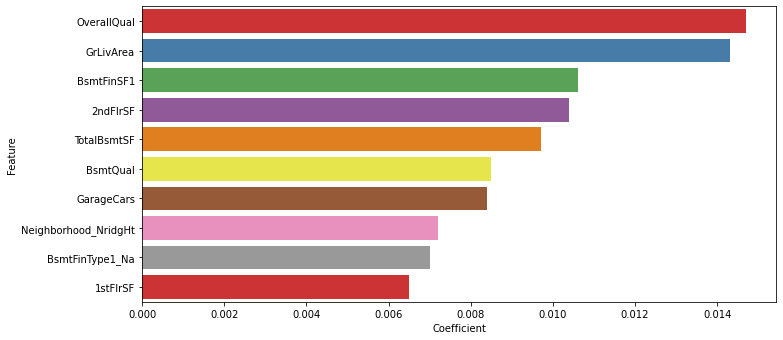

In [2088]:
ridge_coeffs_df = ridge_coeffs.sort_values(by=['Coefficient'], ascending=False)

ridge_coeffs_df = ridge_coeffs_df.head(10)
# bar plot 

plt.figure(figsize=(25,25))
plt.subplot(4,2,1)
sns.barplot(y = 'Feature', x='Coefficient', palette='Set1', data = ridge_coeffs_df)
plt.show()

### Conclusion 1 Ridge
- These variables are significant in predicting the price of a house, and
- These variables describe the price of a house.
- We are getting almost same r2 on both training and testing set which proves our model is not overfitted




### Lasso Regression

In [2089]:
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lasso = Lasso()

lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_Train_RFE, y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [2090]:
lasso_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
1,0.0002,-0.015169,-0.015818,1
2,0.0003,-0.015160,-0.015822,2
3,0.0004,-0.015155,-0.015833,3
0,0.0001,-0.015180,-0.015834,4
4,0.0005,-0.015155,-0.015837,5
5,0.001,-0.015236,-0.015912,6
6,0.01,-0.019779,-0.020270,7
7,0.1,-0.054155,-0.054192,8
8,1,-0.054155,-0.054192,8
9,10,-0.054155,-0.054192,8


In [2091]:
lasso = Lasso(alpha=0.0002)
lasso.fit(X_Train_RFE, y_train)
y_Train_pred = lasso.predict(X_Train_RFE)

##Train R2
r2_score(y_train, y_Train_pred)



0.9037507971447643

In [2092]:
y_pred = lasso.predict(X_Test_RFE)
mean_squared_error(y_test, y_pred)


0.0007386026502956293

In [2093]:
## Test R2
r2_score(y_test, y_pred)

0.8826145980443642

In [2094]:
##Printing Coefficients and Features
lasso_coeffs = pd.DataFrame({'Feature':X_Train_RFE.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_coeffs.reset_index(drop=True, inplace=True)
lasso_coeffs

,Feature,Coefficient
0,MSSubClass,-0.0049
1,LotArea,0.0034
2,OverallQual,0.0153
3,OverallCond,0.0056
4,YearBuilt,0.0050
5,BsmtQual,0.0086
6,BsmtFinSF1,0.0113
7,BsmtUnfSF,0.0000
8,TotalBsmtSF,0.0089
9,1stFlrSF,0.0000


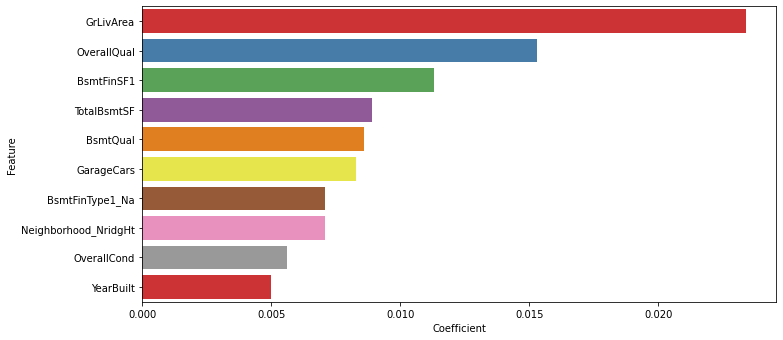

In [2095]:
lasso_coeffs_df = lasso_coeffs.sort_values(by=['Coefficient'], ascending=False)

lasso_coeffs_df = lasso_coeffs_df.head(10)
# bar plot 

plt.figure(figsize=(25,25))
plt.subplot(4,2,1)
sns.barplot(y = 'Feature', x='Coefficient', palette='Set1', data = lasso_coeffs_df)
plt.show()

### Conclusion 2 Lasso
- These variables are significant in predicting the price of a house, and
- These variables describe the price of a house.

# Conclusion :

- Optimal lambda value of Ridge and Lasso is as below:
    - Ridge - 20
    - Lasso - 0.0002
    
- MSE in case of Ridge and Lasso are:
    - Ridge - 0.000740
    - Lasso - 0.000738
    
- MSE of Lasso is lower than that of Ridge and Lasso helps in feature reduction 
- Lasso has a better upper hand over Ridge.



### Assignment Questions

- What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


In [2096]:
lasso = Lasso(alpha=2*0.0002)
lasso.fit(X_Train_RFE, y_train)

Lasso(alpha=0.0004, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [2097]:
#R2 Train
y_Train_pred = lasso.predict(X_Train_RFE)
r2_score(y_train, y_Train_pred)

0.9031936539598077

In [2098]:
#R2 Test
y_Test_pred = lasso.predict(X_Test_RFE)
r2_score(y_test, y_Test_pred)

0.8821870728042912

In [2099]:
y_pred = lasso.predict(X_Test_RFE)
mean_squared_error(y_test, y_pred)

0.0007412926890067923

In [2100]:
##Printing Coefficients and Features
lasso_coeffs = pd.DataFrame({'Feature':X_Train_RFE.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_coeffs.reset_index(drop=True, inplace=True)
lasso_coeffs

,Feature,Coefficient
0,MSSubClass,-0.0047
1,LotArea,0.0033
2,OverallQual,0.0155
3,OverallCond,0.0051
4,YearBuilt,0.0050
5,BsmtQual,0.0081
6,BsmtFinSF1,0.0112
7,BsmtUnfSF,-0.0000
8,TotalBsmtSF,0.0073
9,1stFlrSF,0.0000


In [2101]:
lasso_coeffs_df = lasso_coeffs.sort_values(by=['Coefficient'], ascending=False)

lasso_coeffs_df = lasso_coeffs_df.head(5)

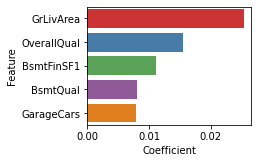

In [2102]:
# bar plot 

plt.figure(figsize=(10,10))
plt.subplot(4,3,1)
sns.barplot(y = 'Feature', x='Coefficient', palette='Set1', data = lasso_coeffs_df)
plt.show()

In [2103]:
## Ridge

In [2104]:
ridge = Ridge(alpha=2*20)
ridge.fit(X_Train_RFE, y_train)

Ridge(alpha=40, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [2105]:
y_pred = ridge.predict(X_Test_RFE)
mean_squared_error(y_test, y_pred)

0.0007465719535336287

In [2106]:
## Train R2
y_Train_pred = ridge.predict(X_Train_RFE)
r2_score(y_train, y_Train_pred)

0.9033203580383578

In [2107]:
## Test R2
y_pred = ridge.predict(X_Test_RFE)
r2_score(y_test, y_pred)

0.8813480444197265

In [2108]:
##Printing Coefficients and Features
ridge_coeffs = pd.DataFrame({'Feature':X_Train_RFE.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_coeffs.reset_index(drop=True, inplace=True)
ridge_coeffs

,Feature,Coefficient
0,MSSubClass,-0.0045
1,LotArea,0.0040
2,OverallQual,0.0143
3,OverallCond,0.0054
4,YearBuilt,0.0052
5,BsmtQual,0.0080
6,BsmtFinSF1,0.0100
7,BsmtUnfSF,-0.0009
8,TotalBsmtSF,0.0093
9,1stFlrSF,0.0070


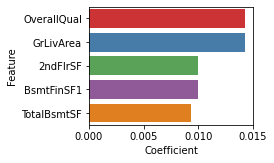

In [2109]:
ridge_coeffs_df = ridge_coeffs.sort_values(by=['Coefficient'], ascending=False)

ridge_coeffs_df = ridge_coeffs_df.head(5)
# bar plot 

plt.figure(figsize=(10,10))
plt.subplot(4,3,1)
sns.barplot(y = 'Feature', x='Coefficient', palette='Set1', data = ridge_coeffs_df)
plt.show()

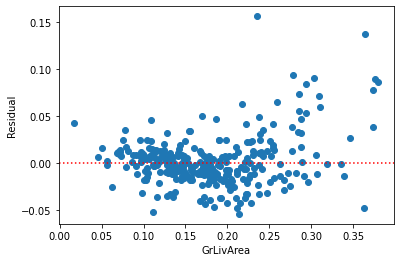

In [2110]:
# Residual analysis
y_res = y_test - y_pred # Residuals

# Residual v/s predictions plot
plt.scatter( y_pred , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("GrLivArea")
plt.ylabel("Residual")
plt.show()

- Question 3) After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [2111]:
lasso_coeffs_df

,Feature,Coefficient
11,GrLivArea,0.0253
2,OverallQual,0.0155
6,BsmtFinSF1,0.0112
5,BsmtQual,0.0081
13,GarageCars,0.0079


In [2112]:
## Dropping top 5 columns
X_train = X_train.drop(columns=['GrLivArea','OverallQual','BsmtFinSF1','TotalBsmtSF','BsmtQual','Id'])
X_test = X_test.drop(columns=['GrLivArea','OverallQual','BsmtFinSF1','TotalBsmtSF','BsmtQual','Id'])

In [2113]:
# Running RFE with the output number of the variable equal to 20
from sklearn.feature_selection import RFE


lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 20)            
rfe = rfe.fit(X_train, y_train)
rfe_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Name', 'RFE_support', 'RFE_ranking'])
rfe_df

,Name,RFE_support,RFE_ranking
0,MSSubClass,True,1
1,LotFrontage,False,82
2,LotArea,True,1
3,LotConfig,False,83
4,HouseStyle,False,86
5,OverallCond,True,1
6,YearBuilt,True,1
7,YearRemodAdd,True,1
8,MasVnrType,False,37
9,MasVnrArea,False,38


In [2114]:
##Taking only true RFE Support
rfe_df = rfe_df.loc[rfe_df['RFE_support'] == True]
rfe_df.reset_index(drop=True, inplace=True)
rfe_df

,Name,RFE_support,RFE_ranking
0,MSSubClass,True,1
1,LotArea,True,1
2,OverallCond,True,1
3,YearBuilt,True,1
4,YearRemodAdd,True,1
5,ExterQual,True,1
6,BsmtUnfSF,True,1
7,1stFlrSF,True,1
8,2ndFlrSF,True,1
9,BsmtFullBath,True,1


In [2115]:
##New Train and Test according to RFE
col = rfe_df['Name'].values
X_Train_RFE = X_train[col]
X_Test_RFE =  X_test[col]

In [2116]:
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lasso = Lasso()

lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_Train_RFE, y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [2117]:
lasso_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
1,0.0002,-0.015965,-0.016891,1
0,0.0001,-0.015983,-0.016896,2
2,0.0003,-0.015960,-0.016899,3
3,0.0004,-0.015968,-0.016915,4
4,0.0005,-0.015990,-0.016940,5
5,0.001,-0.016159,-0.017072,6
6,0.01,-0.022862,-0.023642,7
7,0.1,-0.054155,-0.054192,8
8,1,-0.054155,-0.054192,8
9,10,-0.054155,-0.054192,8


In [2118]:
lasso = Lasso(alpha=0.0002)
lasso.fit(X_Train_RFE, y_train)
y_Train_pred = lasso.predict(X_Train_RFE)

##Train R2
r2_score(y_train, y_Train_pred)



0.897877022275973

In [2119]:
y_pred = lasso.predict(X_Test_RFE)
mean_squared_error(y_test, y_pred)


0.0007421770876121808

In [2120]:
## Test R2
r2_score(y_test, y_pred)

0.882046516192775

In [2121]:
##Printing Coefficients and Features
lasso_coeffs = pd.DataFrame({'Feature':X_Train_RFE.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_coeffs.reset_index(drop=True, inplace=True)
lasso_coeffs

,Feature,Coefficient
0,MSSubClass,-0.0079
1,LotArea,0.0033
2,OverallCond,0.0072
3,YearBuilt,0.0133
4,YearRemodAdd,-0.0033
5,ExterQual,0.0086
6,BsmtUnfSF,-0.0031
7,1stFlrSF,0.0304
8,2ndFlrSF,0.0271
9,BsmtFullBath,0.0037


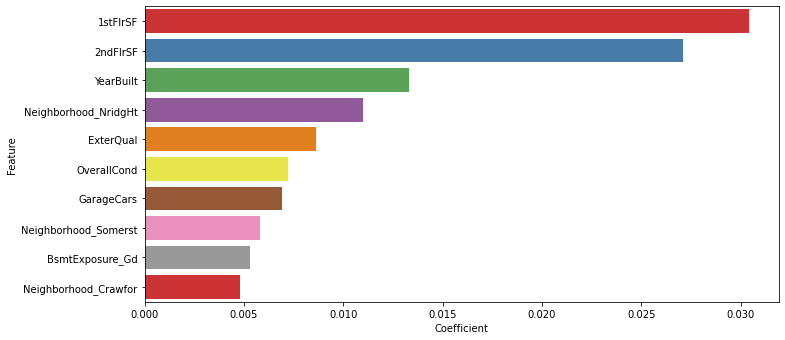

In [2122]:
lasso_coeffs_df = lasso_coeffs.sort_values(by=['Coefficient'], ascending=False)

lasso_coeffs_df = lasso_coeffs_df.head(10)
# bar plot 

plt.figure(figsize=(25,25))
plt.subplot(4,2,1)
sns.barplot(y = 'Feature', x='Coefficient', palette='Set1', data = lasso_coeffs_df)
plt.show()

In [2123]:
lasso_coeffs_df

,Feature,Coefficient
7,1stFlrSF,0.0304
8,2ndFlrSF,0.0271
3,YearBuilt,0.0133
16,Neighborhood_NridgHt,0.0110
5,ExterQual,0.0086
2,OverallCond,0.0072
11,GarageCars,0.0069
17,Neighborhood_Somerst,0.0058
13,BsmtExposure_Gd,0.0053
15,Neighborhood_Crawfor,0.0048
